In [1]:
import numpy as np
import pandas
import sklearn
import matplotlib.pyplot as plt
import tensorflow as tf
import keras
import imblearn

In [2]:
#read the file into a dataframe

data = pandas.read_csv('DataSetForPhishingVSBenignUrl.csv')

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

#Set up features and target sets
X = data.drop('URL_Type_obf_Type', axis=1)
y = data['URL_Type_obf_Type']

#Impute missing values
X = np.where(np.isinf(X), 1e10, X)
imputer = SimpleImputer(strategy='mean')
X = imputer.fit_transform(X)

#Split train and testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

#Train model
depths = [1, 2, 3, 4, 5, 6]
impuritys = ['gini', 'entropy']

for impurity in impuritys:
    for depth in depths:
        dtc = DecisionTreeClassifier(max_depth=depth, criterion=impurity)
        dtc.fit(X_train, y_train)
        y_pred = dtc.predict(X_test)

        #Accuracy
        print(f'Tree Depth: {depth}, Impurity Measure: {impurity}')
        print('Misclassification examples: %d' % (y_test != y_pred).sum())
        print('Train accuracy: %.3f' % dtc.score(X_train, y_train))
        print('Test accuracy: %.3f' % dtc.score(X_test, y_test))
        print()

Tree Depth: 1, Impurity Measure: gini
Misclassification examples: 4578
Train accuracy: 0.377
Test accuracy: 0.376

Tree Depth: 2, Impurity Measure: gini
Misclassification examples: 3716
Train accuracy: 0.490
Test accuracy: 0.494

Tree Depth: 3, Impurity Measure: gini
Misclassification examples: 2703
Train accuracy: 0.622
Test accuracy: 0.632

Tree Depth: 4, Impurity Measure: gini
Misclassification examples: 2365
Train accuracy: 0.673
Test accuracy: 0.678

Tree Depth: 5, Impurity Measure: gini
Misclassification examples: 2024
Train accuracy: 0.725
Test accuracy: 0.724

Tree Depth: 6, Impurity Measure: gini
Misclassification examples: 1634
Train accuracy: 0.775
Test accuracy: 0.777

Tree Depth: 1, Impurity Measure: entropy
Misclassification examples: 4576
Train accuracy: 0.379
Test accuracy: 0.377

Tree Depth: 2, Impurity Measure: entropy
Misclassification examples: 3581
Train accuracy: 0.514
Test accuracy: 0.512

Tree Depth: 3, Impurity Measure: entropy
Misclassification examples: 2829


In [4]:
# For this dataset, entropy and gini impurity measures produced similar results at each tree depth. Entropy slightly out performs gini at the final depth 6.
# We can also see from the dataset that the accuracy increase as depth increases. If we increase the max depth beyond 6, I imagine the accuracy will increaes as well.
# The models do not show signs of overfitting since training accuracies and test accuracies are similar at teach depth.

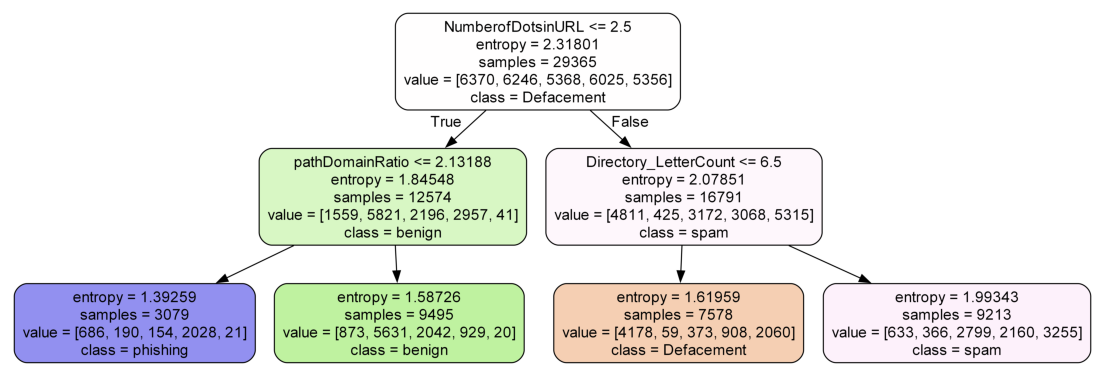

In [9]:
from sklearn.tree import export_graphviz
from subprocess import call

feature_names = data.columns[:-1].tolist()
class_names = np.unique(y).tolist()

dtc = DecisionTreeClassifier(max_depth=2, criterion='entropy')
dtc.fit(X_train, y_train)
y_pred = dtc.predict(X_test)

# Export the tree visualization to a .dot file
export_graphviz(dtc,
                out_file='tree.dot', 
                feature_names = feature_names,
                class_names = class_names,
                rounded = True, 
                proportion = False, 
                precision = 5, 
                filled = True)

# Generate the PNG image from the .dot file
call(['C:/Program Files/Graphviz/bin/dot', '-Tpng', 'C:\\Users\\16142\\Documents\\NYU\\ML\\HWs\\tree.dot', '-o', 'tree.png', '-Gdpi=600'])


# Plot the tree image
plt.figure(figsize = (14, 18))
plt.imshow(plt.imread('tree.png'))
plt.axis('off');
plt.show();

In [ ]:
# At the first decision split, it was whether the NumberofDotsinURL was <= to 2.5. 12.5k samples were and 16.7k samples were not.
# The second decision split was pathDomainRatio <= 2.13 and Directory_LetterCount <=6.5. This further split that data into 4 catagories which are then classfied into each of the four classes
# The entropy values for all 4 classes are over 1 at depth 2. This means the data is highly uncertain and disordered. This is evident from the test and train accuracy of ~50%. 
# Normally entropy is between 1 and 0. The entropy values from this model shows just how disordered the subsets are. 